<a href="https://colab.research.google.com/github/feiduobaby/good-first-issue/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. Machine Learning for Classification**


3.1 Data Preparation

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [20]:
!wget $'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

--2025-10-13 15:29:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv.2’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.01s   

2025-10-13 15:29:24 (5.76 MB/s) - ‘course_lead_scoring.csv.2’ saved [80876/80876]



In [21]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [22]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [23]:
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


3.2 Fillna

In [24]:
df.number_of_courses_viewed = pd.to_numeric(df.number_of_courses_viewed, errors='coerce').fillna(0)
df.annual_income = pd.to_numeric(df.annual_income, errors='coerce').fillna(0.0)
df.interaction_count = pd.to_numeric(df.interaction_count, errors='coerce').fillna(0)
df.lead_score = pd.to_numeric(df.lead_score, errors='coerce').fillna(0.0)
df.lead_source = df.lead_source.fillna('NA')
df.industry = df.industry.fillna('NA')
df.employment_status = df.employment_status.fillna('NA')
df.location = df.location.fillna('NA')

In [25]:
df['industry'].mode()[0]

'retail'

3.3 biggest correlation

In [26]:
list1 = ['interaction_count','number_of_courses_viewed']
df[list1].corrwith(df.lead_score).abs()

,0
interaction_count,0.009888
number_of_courses_viewed,0.004879


In [27]:
list2 = ['number_of_courses_viewed','annual_income']
df[list2].corrwith(df.interaction_count).abs()

,0
number_of_courses_viewed,0.023565
annual_income,0.027036


3.4 split the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
mutual_info_score(df_full_train.industry, df_full_train.converted)

np.float64(0.008173022583466888)

In [32]:
mutual_info_score(df_full_train.location, df_full_train.converted)

np.float64(0.0012115327428980638)

In [33]:
mutual_info_score(df_full_train.lead_source, df_full_train.converted)

np.float64(0.024561797800259202)

In [34]:
mutual_info_score(df_full_train.employment_status, df_full_train.converted)

np.float64(0.012690204266619348)

In [83]:
#categorical = ['lead_source', 'industry', 'employment_status', 'location']
#categorical = ['lead_source']
#categorical = ['industry']
categorical = ['employment_status']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [84]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

EDA

In [85]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.isnull().sum()

,0
lead_source,0
industry,0
number_of_courses_viewed,0
annual_income,0
employment_status,0
location,0
interaction_count,0
lead_score,0
converted,0


In [86]:
df_full_train.converted.value_counts(normalize=True)

,proportion
converted,
1,0.611634
0,0.388366


In [87]:
df_full_train.converted.mean()

np.float64(0.611633875106929)

3.5 Logistic Regression

In [88]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-7, 7, 51)
sigmoid(10000)

np.float64(1.0)

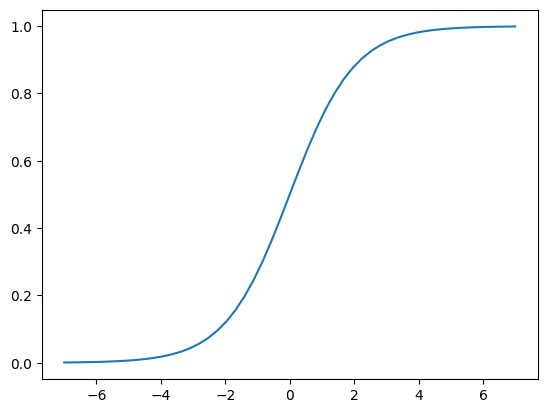

In [41]:
plt.plot(z, sigmoid(z))

In [89]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

3.6 Training logistic regression with Scikit-Learn

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

3.7 use the model

In [107]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.converted.values
#model = LogisticRegression(solver='liblinear', C=0.01, max_iter=1000, random_state=42) 0.757679
#model = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, random_state=42) 0.754266
#model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42) 0.750853
#model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42) 0.750853
model = LogisticRegression(solver='liblinear', C=100, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

In [108]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred

array([0.72512833, 0.45954771, 0.77314247, 0.41976145, 0.79049644,
       0.41809241, 0.50947282, 0.65582212, 0.8052752 , 0.81805742,
       0.67164894, 0.80160052, 0.64842418, 0.22540403, 0.83232087,
       0.77084492, 0.68495763, 0.5915193 , 0.80661352, 0.71232527,
       0.37344582, 0.80940126, 0.86921901, 0.61492391, 0.51897816,
       0.805217  , 0.64872994, 0.56744513, 0.45591369, 0.56221136,
       0.82083179, 0.59833616, 0.42927638, 0.72967323, 0.74416807,
       0.76411703, 0.769241  , 0.80215416, 0.77258845, 0.70212789,
       0.43668467, 0.73832824, 0.53135573, 0.95514795, 0.61531502,
       0.62268056, 0.54581533, 0.48318166, 0.65644259, 0.80121304,
       0.47247229, 0.56759801, 0.9764854 , 0.81173795, 0.4541256 ,
       0.38209239, 0.29613801, 0.63483065, 0.83975799, 0.86114884,
       0.84570014, 0.60379074, 0.79846685, 0.89740685, 0.80804818,
       0.5924241 , 0.60349722, 0.35973597, 0.31737341, 0.55519449,
       0.97388794, 0.47656085, 0.82346992, 0.66801373, 0.68602

In [109]:
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

np.float64(0.7508532423208191)

In [97]:
y_test

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1])

In [80]:
customer = dicts_test[-1]
customer

{'industry': 'healthcare',
 'number_of_courses_viewed': 1,
 'annual_income': 0.0,
 'interaction_count': 4,
 'lead_score': 0.5}

In [81]:
X_small = dv.transform([customer])
model.predict_proba(X_small)[0, 1]

np.float64(0.8073456326465046)

In [82]:
y_test[-1]

np.int64(1)